In [1]:
import osmnx as ox
import matplotlib.pyplot as plt 

OSError: could not find or load spatialindex_c-64.dll

In [5]:
north, south, east, west = 35.581702,35.584546,-78.800222,-78.797915

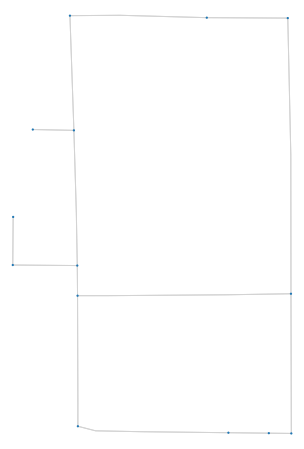

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

In [7]:
for i in G.nodes:
    print(i)

195438253
195438255
195438631
195447516
195447518
195447520
195500922
195594836
6359366687
7463971107
7472627041
7472627042
8739204976
8739204978


In [8]:
Nodes = []
for i in G.nodes:
    Nodes.append(i)

In [9]:
Nodes

[195438253,
 195438255,
 195438631,
 195447516,
 195447518,
 195447520,
 195500922,
 195594836,
 6359366687,
 7463971107,
 7472627041,
 7472627042,
 8739204976,
 8739204978]

In [3]:
import pandas as pd
data = pd.DataFrame(Nodes)
data.rename(columns = {0:'Nodes'}, inplace = True)
data

NameError: name 'Nodes' is not defined

In [12]:
lat1 = []
long1 = []
for i in Nodes:
    lat1.append(G.nodes[i].get('y'))
    long1.append(G.nodes[i].get('x'))

In [13]:
data['Latitude'] = lat1
data['Longitude'] = long1

In [14]:
data

,Nodes,Latitude,Longitude
0,195438253,35.582010,-78.799760
1,195438255,35.581969,-78.798268
2,195438631,35.584332,-78.798292
3,195447516,35.582924,-78.799764
4,195447518,35.583693,-78.799788
5,195447520,35.584345,-78.799816
6,195500922,35.582764,-78.798270
7,195594836,35.582753,-78.799763
8,6359366687,35.584334,-78.798859
9,7463971107,35.583698,-78.800076


In [17]:
data.to_csv("Smallbox.csv")

In [2]:
import pandas as pd
from geopy import distance
import requests # to call the openmap/google apis
import json
import datetime
import math
import itertools
import numpy as np

In [4]:
df1 = pd.read_csv("Smallbox.csv")

In [5]:
df1

,Nodes,Latitude,Longitude
0,195438253,35.582010,-78.799760
1,195438255,35.581969,-78.798268
2,195438631,35.584332,-78.798292
3,195447516,35.582924,-78.799764
4,195447518,35.583693,-78.799788
5,195447520,35.584345,-78.799816
6,195500922,35.582764,-78.798270
7,195594836,35.582753,-78.799763
8,6359366687,35.584334,-78.798859
9,7463971107,35.583698,-78.800076


In [6]:
df1 = df1.drop(['Nodes'],axis=1)
df1.rename(columns = {'Latitude':'Left'}, inplace = True)
df1.rename(columns = {'Longitude':'Right'}, inplace = True)

In [7]:
df1

,Left,Right
0,35.582010,-78.799760
1,35.581969,-78.798268
2,35.584332,-78.798292
3,35.582924,-78.799764
4,35.583693,-78.799788
5,35.584345,-78.799816
6,35.582764,-78.798270
7,35.582753,-78.799763
8,35.584334,-78.798859
9,35.583698,-78.800076


In [11]:
import requests # to call the openmap/google apis
r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{df1.loc[0, "Right"]},{df1.loc[0, "Left"]};{df1.loc[13, "Right"]},{df1.loc[13, "Left"]}?overview=false""")

In [12]:
r.content

b'{"code":"Ok","waypoints":[{"hint":"iQyvivoMr4oAAAAAEgAAAAAAAAAgAAAAAAAAAP-gf0EAAAAA3HnhQQAAAAASAAAAAAAAACAAAAC5RAAAcJxN-zrwHgJwnE37OvAeAgAAPwtNjnQp","distance":0,"location":[-78.79976,35.58201],"name":"South Main Street"},{"hint":"AQ2vipQNr4onAAAAAAAAAAAAAAAAAAAAmeErQgAAAAAAAAAAAAAAACcAAAAAAAAAAAAAAAAAAAC5RAAAjKBN-xXwHgKMoE37FfAeAgAArwVNjnQp","distance":0,"location":[-78.798708,35.581973],"name":"East Vance Street"}],"routes":[{"legs":[{"steps":[],"weight":12.9,"distance":95.5,"summary":"","duration":12.9}],"weight_name":"routability","weight":12.9,"distance":95.5,"duration":12.9}]}'

In [15]:
import json
df3 = pd.DataFrame()
for j in df1.index:
    list1 = []
    for i in df1.index:
        r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{df1.loc[j, "Right"]},{df1.loc[j, "Left"]};{df1.loc[i, "Right"]},{df1.loc[i, "Left"]}?overview=false""")
        list1.append(json.loads(r.content)["routes"][0]["distance"])
    df3[j] = list1

In [16]:
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,135.3,397.7,101.7,187.2,259.8,223.8,82.6,346.4,213.3,142.5,172.9,121.1,95.5
1,135.3,0.0,262.8,237.0,322.6,395.1,88.4,218.0,314.1,348.6,277.8,308.3,14.2,39.8
2,397.7,262.8,0.0,296.0,210.4,137.9,174.4,315.0,51.3,236.5,336.8,367.3,277.1,302.7
3,101.7,237.0,296.0,0.0,85.6,158.1,154.1,19.0,244.7,111.6,40.8,71.3,222.8,197.2
4,187.2,322.6,210.4,85.6,0.0,72.6,239.6,104.6,159.2,26.1,126.4,156.8,308.4,282.8
5,259.8,395.1,137.9,158.1,72.6,0.0,312.2,177.1,86.6,98.6,198.9,229.4,380.9,355.3
6,223.8,88.4,174.4,154.1,239.6,312.2,0.0,135.1,225.7,265.7,194.9,225.4,102.6,128.2
7,82.6,218.0,309.5,19.0,104.6,177.1,135.1,0.0,263.7,130.6,59.8,90.3,203.8,178.2
8,346.4,314.1,51.3,244.7,159.2,86.6,225.7,263.7,0.0,185.2,285.5,316.0,328.3,441.9
9,333.6,469.0,356.9,232.0,146.4,219.0,386.1,251.0,305.6,0.0,233.8,264.3,454.8,429.2


In [17]:
df = df1

In [18]:
df['coordinate'] = list(zip(df['Right'],df['Left']))
df['ID'] = df.index

In [19]:
df

,Left,Right,coordinate,ID
0,35.582010,-78.799760,"(-78.7997604, 35.58201)",0
1,35.581969,-78.798268,"(-78.7982676, 35.5819692)",1
2,35.584332,-78.798292,"(-78.7982923, 35.5843317)",2
3,35.582924,-78.799764,"(-78.7997645, 35.5829241)",3
4,35.583693,-78.799788,"(-78.7997882, 35.5836931)",4
5,35.584345,-78.799816,"(-78.7998159, 35.5843454)",5
6,35.582764,-78.798270,"(-78.79827, 35.5827637)",6
7,35.582753,-78.799763,"(-78.7997627, 35.5827526)",7
8,35.584334,-78.798859,"(-78.7988587, 35.584334)",8
9,35.583698,-78.800076,"(-78.8000756, 35.5836978)",9


In [20]:
locations = dict( ( ID, (df.loc[ID, 'Right'], df.loc[ID, 'Left']) ) for ID in df.index)
locations

{0: (-78.7997604, 35.58201),
 1: (-78.7982676, 35.5819692),
 2: (-78.7982923, 35.5843317),
 3: (-78.7997645, 35.5829241),
 4: (-78.7997882, 35.5836931),
 5: (-78.7998159, 35.5843454),
 6: (-78.79827, 35.5827637),
 7: (-78.7997627, 35.5827526),
 8: (-78.7988587, 35.584334),
 9: (-78.8000756, 35.5836978),
 10: (-78.8002157, 35.5829271),
 11: (-78.800213, 35.5832007),
 12: (-78.7984249, 35.5819707),
 13: (-78.7987076, 35.5819733)}

In [21]:
distances_df = df3
distances_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,135.3,397.7,101.7,187.2,259.8,223.8,82.6,346.4,213.3,142.5,172.9,121.1,95.5
1,135.3,0.0,262.8,237.0,322.6,395.1,88.4,218.0,314.1,348.6,277.8,308.3,14.2,39.8
2,397.7,262.8,0.0,296.0,210.4,137.9,174.4,315.0,51.3,236.5,336.8,367.3,277.1,302.7
3,101.7,237.0,296.0,0.0,85.6,158.1,154.1,19.0,244.7,111.6,40.8,71.3,222.8,197.2
4,187.2,322.6,210.4,85.6,0.0,72.6,239.6,104.6,159.2,26.1,126.4,156.8,308.4,282.8
5,259.8,395.1,137.9,158.1,72.6,0.0,312.2,177.1,86.6,98.6,198.9,229.4,380.9,355.3
6,223.8,88.4,174.4,154.1,239.6,312.2,0.0,135.1,225.7,265.7,194.9,225.4,102.6,128.2
7,82.6,218.0,309.5,19.0,104.6,177.1,135.1,0.0,263.7,130.6,59.8,90.3,203.8,178.2
8,346.4,314.1,51.3,244.7,159.2,86.6,225.7,263.7,0.0,185.2,285.5,316.0,328.3,441.9
9,333.6,469.0,356.9,232.0,146.4,219.0,386.1,251.0,305.6,0.0,233.8,264.3,454.8,429.2


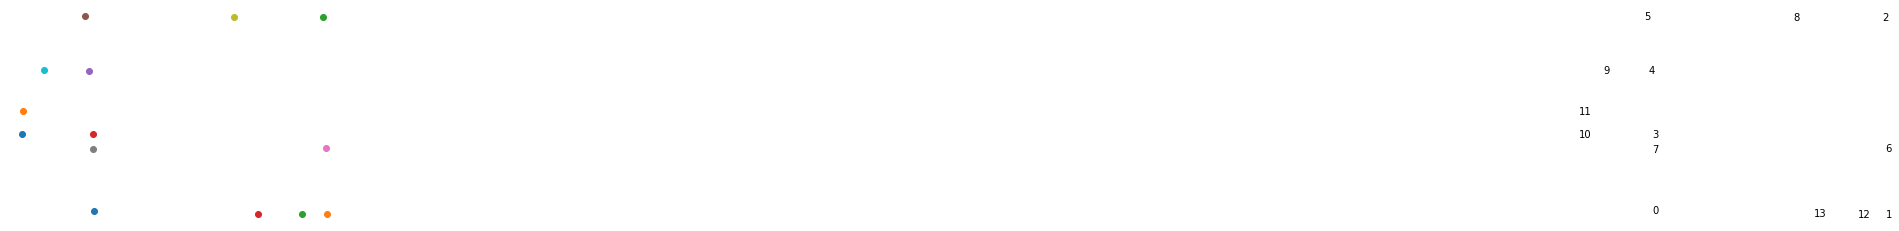

In [22]:
import matplotlib.pyplot as plt
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
plt.gca().axis('off');

In [23]:
distance = distances_df

In [24]:
type(df.ID[0])

numpy.int64

In [25]:
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)
distances

{(0, 1): 135.3,
 (0, 2): 397.7,
 (0, 3): 101.7,
 (0, 4): 187.2,
 (0, 5): 259.8,
 (0, 6): 223.8,
 (0, 7): 82.6,
 (0, 8): 346.4,
 (0, 9): 213.3,
 (0, 10): 142.5,
 (0, 11): 172.9,
 (0, 12): 121.1,
 (0, 13): 95.5,
 (1, 0): 135.3,
 (1, 2): 262.8,
 (1, 3): 237.0,
 (1, 4): 322.6,
 (1, 5): 395.1,
 (1, 6): 88.4,
 (1, 7): 218.0,
 (1, 8): 314.1,
 (1, 9): 348.6,
 (1, 10): 277.8,
 (1, 11): 308.3,
 (1, 12): 14.2,
 (1, 13): 39.8,
 (2, 0): 397.7,
 (2, 1): 262.8,
 (2, 3): 296.0,
 (2, 4): 210.4,
 (2, 5): 137.9,
 (2, 6): 174.4,
 (2, 7): 315.0,
 (2, 8): 51.3,
 (2, 9): 236.5,
 (2, 10): 336.8,
 (2, 11): 367.3,
 (2, 12): 277.1,
 (2, 13): 302.7,
 (3, 0): 101.7,
 (3, 1): 237.0,
 (3, 2): 296.0,
 (3, 4): 85.6,
 (3, 5): 158.1,
 (3, 6): 154.1,
 (3, 7): 19.0,
 (3, 8): 244.7,
 (3, 9): 111.6,
 (3, 10): 40.8,
 (3, 11): 71.3,
 (3, 12): 222.8,
 (3, 13): 197.2,
 (4, 0): 187.2,
 (4, 1): 322.6,
 (4, 2): 210.4,
 (4, 3): 85.6,
 (4, 5): 72.6,
 (4, 6): 239.6,
 (4, 7): 104.6,
 (4, 8): 159.2,
 (4, 9): 26.1,
 (4, 10): 126.4,
 (4,

In [48]:
V = 2 #the number vehicles/people deployed

In [49]:
import networkx as nx
from pulp import *
import seaborn as sn
prob=LpProblem("vehicle", LpMinimize)

In [50]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [51]:
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [52]:
#constraints
for v in df.ID:
    cap = 1 if v != 8 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 8 and j!= 8) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [53]:
%time prob.solve()
print(LpStatus[prob.status])

Wall time: 1min 9s
Optimal


In [54]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [55]:
routes = get_next_loc(8)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=8:
        r.append(get_next_loc(r[-1][1])[-1])

In [56]:
routes

[[(8, 2), (2, 6), (6, 1), (1, 12), (12, 13), (13, 0), (0, 7), (7, 8)],
 [(8, 5), (5, 4), (4, 9), (9, 11), (11, 10), (10, 3), (3, 8)]]

In [57]:
routes1 = routes

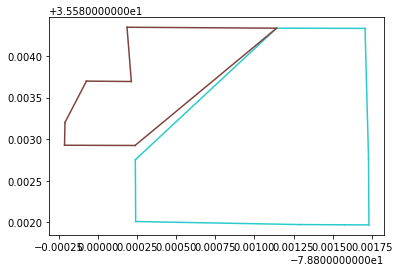

In [58]:
import numpy as np
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

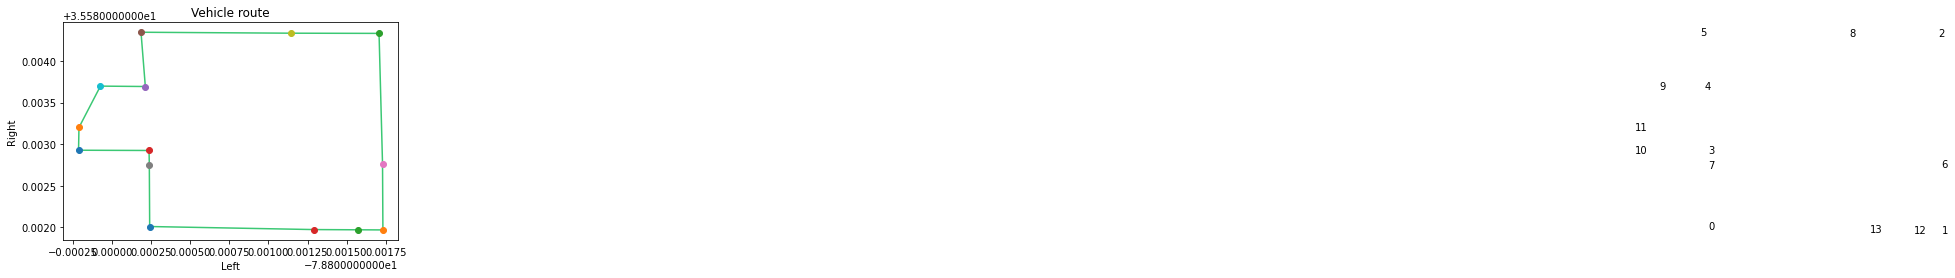

In [38]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()

In [39]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [44]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance
       
    data['num_vehicles'] = 1
    data['depot'] = 8
    return data

In [45]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
       #plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    #print('Maximum of the route distances: {}m'.format(max_route_distance))

In [46]:
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
if __name__ == '__main__':
    main()

Route for vehicle 0:
 8 ->  2 ->  6 ->  1 ->  12 ->  13 ->  0 ->  7 ->  11 ->  10 ->  3 ->  4 ->  9 ->  5 -> 8



In [47]:
routes

[[(8, 5),
  (5, 4),
  (4, 9),
  (9, 11),
  (11, 10),
  (10, 3),
  (3, 7),
  (7, 0),
  (0, 13),
  (13, 12),
  (12, 1),
  (1, 6),
  (6, 2),
  (2, 8)]]